# Test api


In [3]:
from datetime import datetime
import face_recognition 
import matplotlib.pyplot as plt
import os
import numpy as np

'Aaron_Guiel_0001.jpg'

In [ ]:
def get_image_by_name(name):
    path = f'./dataset/{name}/'
    img = next(os.walk(path))[-1][0]
    image_path = path+img
    image = cv2.imread(image_path)
    
    # Encode the image as JPEG to a byte array
    _, buffer = cv2.imencode('.jpg', image)
    img_bytes = buffer.tobytes()
    
    # Encode the byte array to a base64 string
    img_base64 = base64.b64encode(img_bytes).decode('utf-8')
    return img_base64

In [10]:




def update_db(directory_path,save=True,save_path='./known_face_encodings.npy'):
    print('[start to updating database ...]')
    known_face_encodings = []
    errors= []
    # Walk through directory
    d = os.walk(directory_path)
    known_names = next(d)[1]
    c = len(known_names)
    for i,(dirpath, dirnames, filenames) in enumerate(d):
        try:
            filename = filenames[0]
            if filename.endswith(".jpg") or filename.endswith(".png"):
                filepath = os.path.join(dirpath, filename)
                image = face_recognition.load_image_file(filepath)
                face_encoding = face_recognition.face_encodings(image)[0]
                known_face_encodings.append(face_encoding)
                name = known_names[i]
                print(f'{i}/{c} {name}'+' '*20,end='\r')
        except:
            print('')
            print('error in ',i)
            errors.append(i)
            known_face_encodings.append(np.zeros(128))

    print('')
    print('[finish]')
    if save:
        np.save(save_path, np.array(known_face_encodings))

    return known_face_encodings ,errors


In [11]:
def get_info(directory_path,):
    d = os.walk(directory_path)
    known_names = next(d)[1]
    known_face_info = [{"name":name , "id": i} for i,name in enumerate(known_names)]
    return  known_face_info 

In [110]:
len('              ')

14

In [5]:
np.zeros(128).shape

(128,)

In [28]:
info = get_info('./dataset')

In [39]:
import glob


In [12]:
result = update_db('./dataset')

[start to updating database ...]
658/5750 Brandon_Spann                                  
error in  659
696/5750 Brian_Scalabrine                      
error in  697
958/5750 Christy_Turlington                            
error in  959
1323/5750 Derrick_Battie                             
error in  1324
1407/5750 Don_Henley                                      
error in  1408
1518/5750 Elena_Dementieva                       
error in  1519
1529/5750 Eliott_Spitzer                       
error in  1530
1631/5750 Ernie_Preate                                       
error in  1632
2119/5750 Hernan_Crespo                                    
error in  2120
2230/5750 Iran_Brown                                  
error in  2231
2406/5750 Jan_van_Breda_Kolff                      
error in  2407
2487/5750 Jeff_Dederian                               
error in  2488
2560/5750 Jessica_Lange                           
error in  2561
2671/5750 Joe_Torre                              
error in  2672
269

In [17]:
np.array(result[1]).shape

(25,)

In [18]:
x = np.load("known_face_encodings.npy")

In [19]:
filepath="./test.jpg"

In [20]:
image = face_recognition.load_image_file(filepath)
# plt.imshow(image)
face_encoding = face_recognition.face_encodings(image)[0]

In [22]:
u1 = face_recognition.face_encodings(face_recognition.load_image_file('./test.jpg'))[0]
u2 = face_recognition.face_encodings(face_recognition.load_image_file('./test2.jpg'))[0]

In [24]:
distance = face_recognition.face_distance(x,u2)

In [25]:
distance.argmin()

3153

In [29]:
info[3153]

{'name': 'Kurt_Warner', 'id': 3153}

In [5]:
datetime.now().strftime()

<function time.utcoffset>

In [34]:
import face_recognition
from PIL import Image, ImageDraw

# Load the image file
image_path = "test2.jpg"
image = face_recognition.load_image_file(image_path)

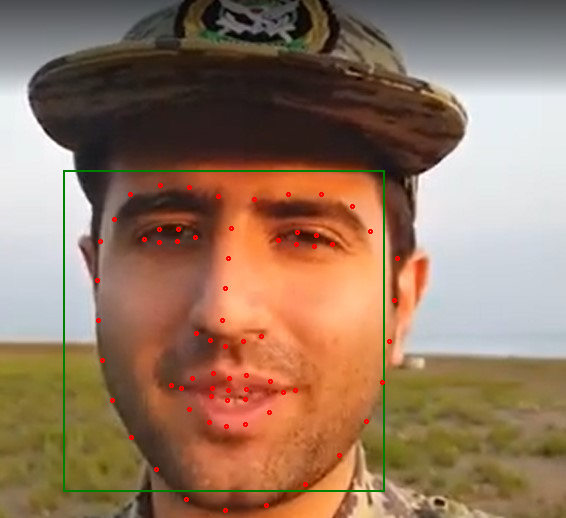

In [36]:


# Find all face locations and face landmarks in the image
face_locations = face_recognition.face_locations(image)
face_landmarks_list = face_recognition.face_landmarks(image)

# Convert the image to a PIL Image
pil_image = Image.fromarray(image)

# Create a Pillow ImageDraw object to draw on the image
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the image
for face_location, face_landmarks in zip(face_locations, face_landmarks_list):
    # Unpack the coordinates from the face location
    top, right, bottom, left = face_location

    # Draw a rectangle around the face
    draw.rectangle([left, top, right, bottom], outline="green", width=2)

    # Draw landmarks
    for landmark, points in face_landmarks.items():
        for point in points:
            draw.ellipse([point[0] - 2, point[1] - 2, point[0] + 2, point[1] + 2], outline="red", width=2)

# Display the image
pil_image

# Save the image if needed
# pil_image.save("output_image.jpg")


In [37]:
face_landmarks_list

[{'chin': [(100, 241),
   (97, 280),
   (98, 320),
   (102, 360),
   (112, 400),
   (131, 437),
   (156, 469),
   (186, 499),
   (225, 510),
   (266, 505),
   (305, 484),
   (339, 455),
   (366, 421),
   (382, 382),
   (389, 341),
   (394, 300),
   (397, 258)],
  'left_eyebrow': [(114, 219), (130, 194), (160, 185), (189, 187), (218, 196)],
  'right_eyebrow': [(254, 199),
   (288, 194),
   (321, 194),
   (352, 206),
   (370, 231)],
  'nose_bridge': [(231, 228), (228, 258), (225, 288), (222, 320)],
  'nose_tip': [(196, 333), (210, 340), (225, 346), (243, 341), (261, 336)],
  'left_eye': [(144, 239),
   (159, 229),
   (178, 229),
   (195, 237),
   (177, 241),
   (159, 242)],
  'right_eye': [(278, 240),
   (297, 232),
   (316, 235),
   (332, 244),
   (314, 246),
   (296, 244)],
  'top_lip': [(171, 385),
   (192, 378),
   (213, 373),
   (229, 378),
   (246, 375),
   (270, 381),
   (295, 390),
   (283, 392),
   (246, 389),
   (228, 390),
   (212, 388),
   (181, 388)],
  'bottom_lip': [(295, 

In [10]:
import requests
import time
token = 'bot161421:780c7727-518e-4d1c-ae20-e5d8a79cf2d5'
chat_id = 161421
caption = 'text of caption file'
title = 'send file by api'
# getMe
# sendMessage 
# sendDocument
# sendFile
url = 'https://eitaayar.ir/api/' + token + '/getMe'
files = {'file': open('./test.jpg', 'rb')}
data = {
    'chat_id': chat_id,
    'title': title,
    'caption': caption,
    'date': int(time.time()) + 1 # send next 30 seconds
}

response = requests.get(url)
print(response.text)

{"ok":true,"result":{"id":161421,"is_bot":false,"first_name":"\u062a\u0633\u062a","last_name":"\u062a\u0633\u062a\u06cc","username":"989903214078","can_join_groups":true,"can_read_all_group_messages":false,"supports_inline_queries":false}}


In [11]:
def send_message(token,chat_id, text, pin=False, date=None, view_to_delete=-1,
                    disable_notification=False, reply_to_message_id=None):
    r = requests.post(
        f"https://eitaayar.ir/api/{token}/sendMessage",
        data={
            'chat_id': chat_id,
            'text': text,
            'pin': int(pin),
            'date': date,
            'viewCountForDelete': view_to_delete,
            'disable_notification': int(disable_notification),
            'reply_to_message_id': reply_to_message_id if reply_to_message_id != None else '',
        }
    )
    print(type(r.json()))
    return r.json()

In [24]:
send_message(token,'9763154','علیکم',date=time.time()+10)

<class 'dict'>


{'ok': True,
 'result': {'message_id': 56793291,
  'from': {'id': 161421,
   'is_bot': False,
   'first_name': 'تست',
   'last_name': 'تستی',
   'username': '989903214078',
   'can_join_groups': True,
   'can_read_all_group_messages': False,
   'supports_inline_queries': False},
  'chat': {'id': 9763154, 'type': 'private'},
  'date': 1717498879,
  'text': 'علیکم'}}